In [281]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
plt.style.use("fivethirtyeight")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import folium

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

import plotly.graph_objects as go
from urllib import request
import json
import os

In [282]:
df = pd.read_csv("C:/Users/HP/Documents/DATASETS/housing india/House Price India.csv")
df.head(10)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
5,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
6,6762813157,42491,5,3.25,3660,11995,2.0,0,2,3,...,2006,0,122008,52.7637,-114.050,3320,11241,3,72,785000
7,6762813599,42491,3,1.75,2240,10578,2.0,0,0,5,...,1923,0,122006,52.9254,-114.482,1570,10578,3,71,750000
8,6762813600,42491,3,2.50,2390,6550,1.0,0,2,4,...,1955,0,122009,52.8014,-114.598,2010,6550,1,73,750000
9,6762814461,42491,4,2.25,2200,11250,1.5,0,0,5,...,1920,0,122010,52.9145,-114.391,2320,10814,2,53,698000


In [283]:
# looking at the shape for the rows and columns
df.shape

(14620, 23)

In [284]:
# Checking for duplicates
df.duplicated().sum()

0

In [285]:
# checking to see the data types of the columns and to see if there are missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [286]:
# getting the statistical summary so far
df.describe().round(2)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,...,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00
mean,6.762821e+09,42604.54,3.38,2.13,2098.26,15093.28,1.50,0.01,0.23,3.43,...,1970.93,90.92,122033.06,52.79,-114.40,1996.70,12753.50,2.01,64.95,538932.22
std,6.237570e+03,67.35,0.94,0.77,928.28,37919.62,0.54,0.09,0.77,0.66,...,29.49,416.22,19.08,0.14,0.14,691.09,26058.41,0.82,8.94,367532.38
min,6.762810e+09,42491.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,...,1900.00,0.00,122003.00,52.39,-114.71,460.00,651.00,1.00,50.00,78000.00
25%,6.762815e+09,42546.00,3.00,1.75,1440.00,5010.75,1.00,0.00,0.00,3.00,...,1951.00,0.00,122017.00,52.71,-114.52,1490.00,5097.75,1.00,57.00,320000.00
50%,6.762821e+09,42600.00,3.00,2.25,1930.00,7620.00,1.50,0.00,0.00,3.00,...,1975.00,0.00,122032.00,52.81,-114.42,1850.00,7620.00,2.00,65.00,450000.00
75%,6.762826e+09,42662.00,4.00,2.50,2570.00,10800.00,2.00,0.00,0.00,4.00,...,1997.00,0.00,122048.00,52.91,-114.32,2380.00,10125.00,3.00,73.00,645000.00
max,6.762832e+09,42734.00,33.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,...,2015.00,2015.00,122072.00,53.01,-113.50,6110.00,560617.00,3.00,80.00,7700000.00


In [287]:
#Transform some relevant col from int64 to float
df["Price"] = (df["Price"].astype(float)) 
df["living area"] = (df["living area"].astype(float)) 
df["living area"] = (df["living area"].astype(float)) 
df["lot area"] = (df["lot area"].astype(float)) 
df["number of bedrooms"] = (df["number of bedrooms"].astype(float)) 
df.info()

                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  float64
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  float64
 5   lot area                               14620 non-null  float64
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [288]:
# After taking some deeper look into the dataset, dropping some cols not related to the Price which is what we want to focus on
df.drop(columns=["number of views", "waterfront present", "Date", "Renovation Year", "lot_area_renov", "living_area_renov",], inplace=True)
df.drop(columns=["Postal Code", "Built Year"], inplace=True)
# Area of basement doesn't always add to the Area of the house if it's not in good condition. We don't have info for the condition so we drop
df.drop(columns=["Area of the basement"], inplace=True)
df.head()


,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,condition of the house,grade of the house,Area of the house(excluding basement),Lattitude,Longitude,Number of schools nearby,Distance from the airport,Price
0,6762810145,5.0,2.50,3650.0,9050.0,2.0,5,10,3370,52.8645,-114.557,2,58,2380000.0
1,6762810635,4.0,2.50,2920.0,4000.0,1.5,5,8,1910,52.8878,-114.470,2,51,1400000.0
2,6762810998,5.0,2.75,2910.0,9480.0,1.5,3,8,2910,52.8852,-114.468,1,53,1200000.0
3,6762812605,4.0,2.50,3310.0,42998.0,2.0,3,9,3310,52.9532,-114.321,3,76,838000.0
4,6762812919,3.0,2.00,2710.0,4500.0,1.5,4,8,1880,52.9047,-114.485,1,51,805000.0


In [289]:
df.shape

(14620, 14)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   number of bedrooms                     14620 non-null  float64
 2   number of bathrooms                    14620 non-null  float64
 3   living area                            14620 non-null  float64
 4   lot area                               14620 non-null  float64
 5   number of floors                       14620 non-null  float64
 6   condition of the house                 14620 non-null  int64  
 7   grade of the house                     14620 non-null  int64  
 8   Area of the house(excluding basement)  14620 non-null  int64  
 9   Lattitude                              14620 non-null  float64
 10  Longitude                              14620 non-null  float64
 11  Nu

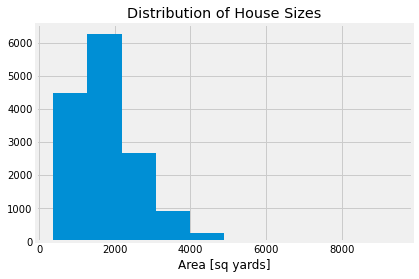

In [291]:
# Examining the Distribution of House sizes across India
plt.hist(df["Area of the house(excluding basement)"])
plt.xlabel("Area [sq yards]")
plt.title("Distribution of House Sizes");

In [292]:
df.describe()["Area of the house(excluding basement)"]


count    14620.000000
mean      1801.783926
std        833.809963
min        370.000000
25%       1200.000000
50%       1580.000000
75%       2240.000000
max       9410.000000
Name: Area of the house(excluding basement), dtype: float64

In [293]:
#  #Subset for outliers in living area
low, high = df["Area of the house(excluding basement)"].quantile([0.1,0.9])
mask_area = df["Area of the house(excluding basement)"].between(low,high)
df = df[mask_area]

In [294]:
df.shape

(11758, 14)

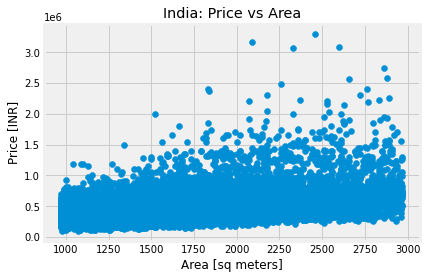

In [295]:
plt.scatter(x=df["Area of the house(excluding basement)"], y=df["Price"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [INR]")
plt.title("India: Price vs Area");

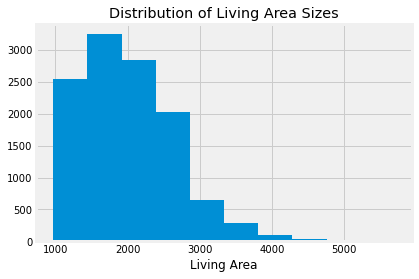

In [296]:
# Examining the Distribution of Living Area in houses across India
plt.hist(df["living area"])
plt.xlabel("Living Area")
plt.title("Distribution of Living Area Sizes");

In [297]:
df.describe()["living area"]

count    11758.000000
mean      2003.606566
std        647.842543
min        970.000000
25%       1500.000000
50%       1930.000000
75%       2420.000000
max       5700.000000
Name: living area, dtype: float64

In [298]:
df.shape

(11758, 14)

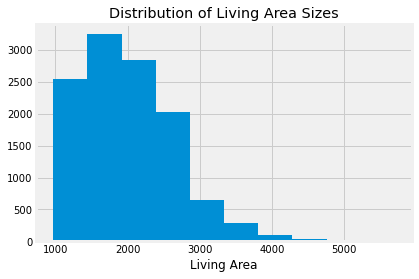

In [299]:
# Examining the Distribution of House sizes across India after removing outliers
plt.hist(df["living area"])
plt.xlabel("Living Area")
plt.title("Distribution of Living Area Sizes");

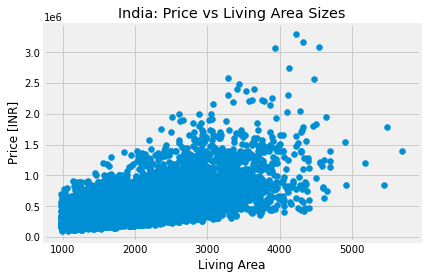

In [300]:
plt.scatter(x=df["living area"], y=df["Price"])
plt.xlabel("Living Area")
plt.ylabel("Price [INR]")
plt.title("India: Price vs Living Area Sizes");

In [301]:
df.sort_values(by="Price",ascending=False).head()

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,condition of the house,grade of the house,Area of the house(excluding basement),Lattitude,Longitude,Number of schools nearby,Distance from the airport,Price
14532,6762810050,3.0,3.25,4220.0,41300.0,1.0,4,11,2460,52.8383,-114.300,2,67,3300000.0
7955,6762810057,5.0,3.50,4330.0,11979.0,1.0,3,12,2090,52.8551,-114.408,3,73,3170000.0
3376,6762810062,4.0,5.00,4550.0,18641.0,1.0,3,10,2600,52.8353,-114.267,3,52,3080000.0
12768,6762810063,3.0,2.50,3930.0,55867.0,1.0,4,8,2330,52.9322,-114.414,3,68,3070000.0
13631,6762810089,4.0,4.00,4130.0,5575.0,2.0,4,10,2860,52.8268,-114.273,2,52,2750000.0


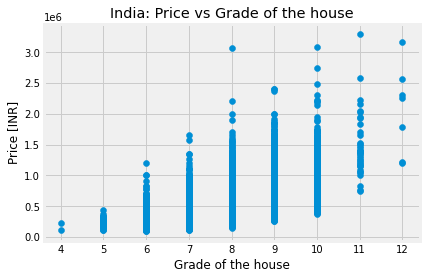

In [302]:
plt.scatter(x=df["grade of the house"], y=df["Price"])
plt.xlabel("Grade of the house")
plt.ylabel("Price [INR]")
plt.title("India: Price vs Grade of the house");

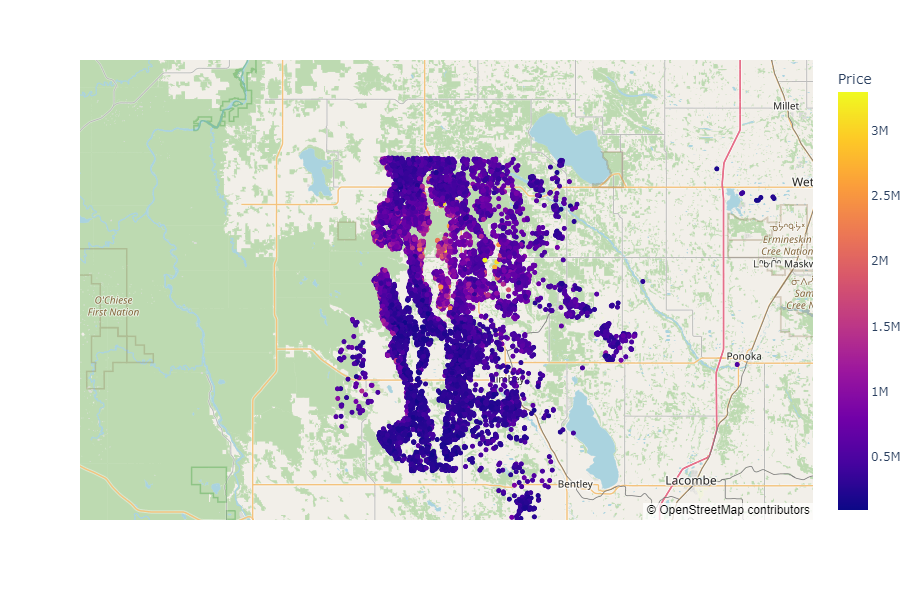

In [303]:
# Draw the Map
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="Lattitude",
    lon="Longitude",
    width=600,  # Width of map
    height=600,  # Height of map
    color="Price",
    hover_data=["Price"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

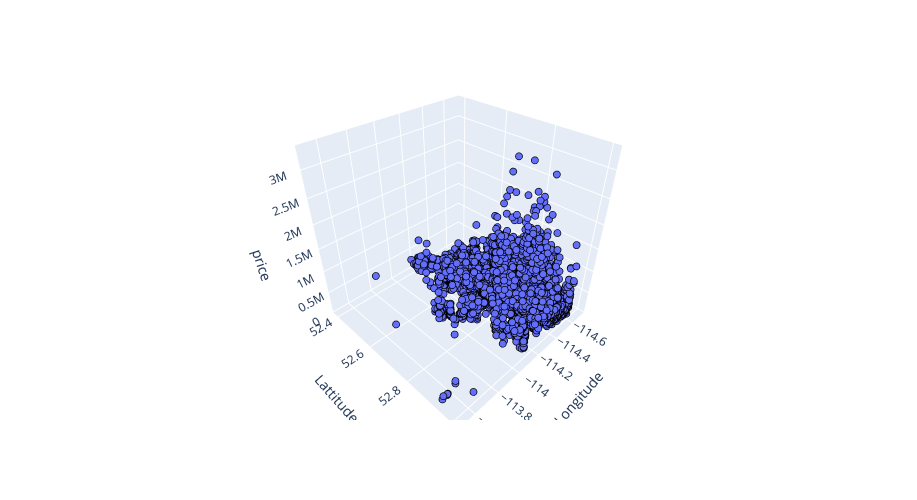

In [304]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x="Longitude",
    y="Lattitude",
    z="Price",
    labels={"lon": "longitude", "lat": "latitude", "Price": "price"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

In [305]:
#Split - Creating the feature matrix named X_train for my model
features = ["living area"]
X_train = df[features]
X_train.head()

,living area
1,2920.0
2,2910.0
4,2710.0
5,2600.0
7,2240.0


In [306]:
# Creating the target vector named y_train, which I'll use to train my model
target = "Price"
y_train = df[target]
y_train.shape

(11758,)

In [307]:
# Calculating the mean of my target vector y_train, and assigning it to the variable y_mean
y_mean = y_train.mean()
y_mean

498802.1380336792

In [308]:
# Creating a list named y_pred_baseline that contains the value of y_mean repeated so that it's the same length at y
y_pred_baseline = [y_mean] * len(y_train)
len(y_pred_baseline) == len(y_train)

True

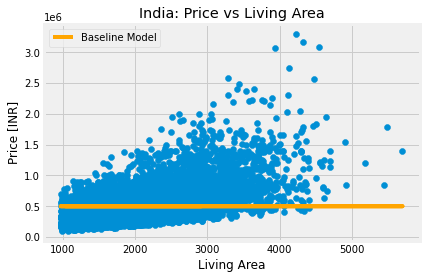

In [309]:
# Adding a line to the plot below that shows the relationship between the observations X_train and my dumb model's predictions y_pred_baseline
plt.plot (X_train, y_pred_baseline, color="orange", label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Living Area")
plt.ylabel("Price [INR]")
plt.title("India: Price vs Living Area")
plt.legend();

In [310]:
# it seems like our baseline model doesn't really follow the trend in the data
# But, as data scientists, we can't depend only on a subjective plot to evaluate a model. 
# We need an exact, mathematically calculate performance metric. 
# There are lots of performance metrics, but the one we'll use here is the mean absolute error

In [311]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean house price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean house price 498802.14
Baseline MAE: 186960.25


In [312]:
# it shows if we always predicted that an apartment price is INR498,802.14, our predictions would be off by an average of INR186,960.25. 
# It also tells us that our model needs to have mean absolute error below INR45,199.46 in order to be useful.

In [313]:
#Iterating
#Building my model
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [314]:
#Evaluating
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([719121.1504422 , 716716.95368377, 668633.01851524, 642186.85417255,
       555635.7708692 ])

In [315]:
# Calculating my training_mae for my predictions in y_pred_training as compared to the true targets in y_train
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 151961.98


In [316]:
#Good news! The model beat the baseline by over INR30,000! That's a good indicator that it will be helpful in predicting house prices.
# But the real test is how this model will perform on data that it hasn't seen before, data that we call the test set

In [323]:
df2 = pd.read_csv("C:/Users/HP/Documents/DATASETS/housing india/House Price India-2.csv")
df2.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810494,42736,3,2.75,2340,8828,1.0,0,0,4,...,1954,0,122047,52.8620,-114.479,3480,8526,3,51,1570000
1,6762810580,42736,4,4.00,4930,22093,2.0,0,3,3,...,2004,0,122020,52.8174,-114.155,4630,18889,1,70,1470000
2,6762810835,42736,4,3.50,3100,2261,2.0,0,2,3,...,1981,0,122010,52.8812,-114.392,2660,2000,2,56,1290000
3,6762812692,42736,4,2.75,2970,59677,1.0,0,2,4,...,1973,0,122020,52.8253,-114.270,2930,42489,2,71,829000
4,6762812744,42736,3,1.75,1930,8442,1.0,0,0,4,...,1953,0,122048,52.8613,-114.394,1790,8442,2,59,825000


In [330]:
# df2.drop(columns=["number of views", "waterfront present", "Date", "Renovation Year", "lot_area_renov", "living_area_renov",], inplace=True)
# df2.drop(columns=["Postal Code", "Built Year"], inplace=True)
# # Area of basement doesn't always add to the Area of the house if it's not in good condition. We don't have info for the condition so we drop
# df2.drop(columns=["Area of the basement"], inplace=True)
df2.dropna(inplace=True)
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2376 entries, 1 to 2973
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     2376 non-null   int64  
 1   number of bedrooms                     2376 non-null   float64
 2   number of bathrooms                    2376 non-null   float64
 3   living area                            2376 non-null   float64
 4   lot area                               2376 non-null   float64
 5   number of floors                       2376 non-null   float64
 6   condition of the house                 2376 non-null   int64  
 7   grade of the house                     2376 non-null   int64  
 8   Area of the house(excluding basement)  2376 non-null   int64  
 9   Lattitude                              2376 non-null   float64
 10  Longitude                              2376 non-null   float64
 11  Numb

In [325]:
df2["Price"] = (df["Price"].astype(float)) 
df2["living area"] = (df["living area"].astype(float)) 
df2["living area"] = (df["living area"].astype(float)) 
df2["lot area"] = (df["lot area"].astype(float)) 
df2["number of bedrooms"] = (df["number of bedrooms"].astype(float)) 

In [331]:
X_test = df2[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    719121.150442
1    716716.953684
2    668633.018515
3    642186.854173
4    555635.770869
dtype: float64

In [317]:
# Communicate Results
#Model Intercept
intercept = round(model.intercept_, 2)
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])


Model Intercept: 17095.7


In [318]:
# Coefficient associated with "Living Area" in my model
coefficient = round(model.coef_[0], 2)
print('Model coefficient for "living area":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "living area": 240.42


In [319]:
# Equation
print(f"house_price = {intercept} + {coefficient} * living_area" )

house_price = 17095.7 + 240.42 * living_area


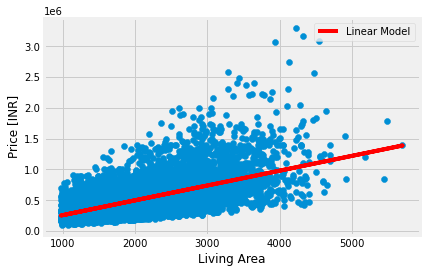

In [263]:
# Scatter plot with line
plt.plot(X_train, model.predict(X_train), color="r", label="Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("Living Area")
plt.ylabel("Price [INR]")
plt.legend();

In [273]:
df.head()

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,condition of the house,grade of the house,Area of the house(excluding basement),Lattitude,Longitude,Number of schools nearby,Distance from the airport,Price,lon,lat
1,6762810635,4.0,2.50,2920.0,4000.0,1.5,5,8,1910,52.8878,-114.470,2,51,1400000.0,-114.470,52.8878
2,6762810998,5.0,2.75,2910.0,9480.0,1.5,3,8,2910,52.8852,-114.468,1,53,1200000.0,-114.468,52.8852
4,6762812919,3.0,2.00,2710.0,4500.0,1.5,4,8,1880,52.9047,-114.485,1,51,805000.0,-114.485,52.9047
5,6762813105,3.0,2.50,2600.0,4750.0,1.0,4,9,1700,52.9133,-114.590,1,67,790000.0,-114.590,52.9133
7,6762813599,3.0,1.75,2240.0,10578.0,2.0,5,8,1550,52.9254,-114.482,3,71,750000.0,-114.482,52.9254
